***
# CAPSTONE PROJECT 3: EDA
### EDA
***

* Import df_cleaned.csv from  Data.
    * Ensure that the index doesn't double import.
* look for patterns that can be found in the Data.
* Visualize Data in informative and interesting ways for insights.
* Consider and decide upon a predictive metric in order to preprocess and model.
* Update Capstone Project Proposal to reflect your findings.

In [3]:
# Import modules for EDA
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

Matplotlib is building the font cache; this may take a moment.


In [4]:
#import cleaned data
#df = pd.read_csv(r"C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_3\Data\df_cleaned.csv")
df = pd.read_csv("/home/mvanslyke/Documents/GitHub/SpringBoardDataScience/Capstone_Project_3/Data/df_cleaned.csv")

In [5]:
df.head()

,Unnamed: 0,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,0,0,01/01/1947 12:00:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,02/01/1947 12:00:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,03/01/1947 12:00:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,04/01/1947 12:00:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,05/01/1947 12:00:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Reset the index
df = df.drop(columns=["Unnamed: 0"])

In [7]:
df.head()

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,0,01/01/1947 12:00:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,02/01/1947 12:00:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,03/01/1947 12:00:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,04/01/1947 12:00:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,05/01/1947 12:00:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.describe()

,Index,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
count,924.000000,924.000000,924.000000,924.000000,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,...,924.000000,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,924.000000,9.240000e+02
mean,461.500000,34.308442,0.079470,530.624459,4.536818e+06,5.260281e+05,4.010790e+06,4.034290e+06,1.081270e+08,9.364566e+07,...,267063.852814,4.529957e+06,4.494917e+06,5.262121e+05,6.029948e+06,4.003745e+06,2.003236e+10,9.202386e+09,0.059632,1.082998e+10
std,266.880123,45.780402,0.298009,2125.964793,1.707314e+07,2.042495e+06,1.504699e+07,6.776581e+06,1.815531e+08,1.588572e+08,...,178051.817943,1.709522e+07,3.897929e+06,2.056010e+06,4.025694e+06,1.506032e+07,3.859407e+10,1.806613e+10,0.210721,2.069385e+10
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,230.750000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
50%,461.500000,23.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,316000.000000,0.000000e+00,4.059000e+06,0.000000e+00,7.588000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
75%,692.250000,56.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.084288e+07,2.340889e+08,2.101536e+08,...,394250.000000,0.000000e+00,7.969000e+06,0.000000e+00,8.982000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
max,923.000000,345.000000,1.440000,11750.000000,8.060000e+07,9.790000e+06,7.087000e+07,2.069144e+07,5.155401e+08,4.547436e+08,...,583000.000000,8.696000e+07,1.396100e+07,1.167000e+07,1.505100e+07,7.528000e+07,1.418502e+11,7.029840e+10,0.900000,7.334734e+10


In [9]:
corr = df.corr(numeric_only=True)

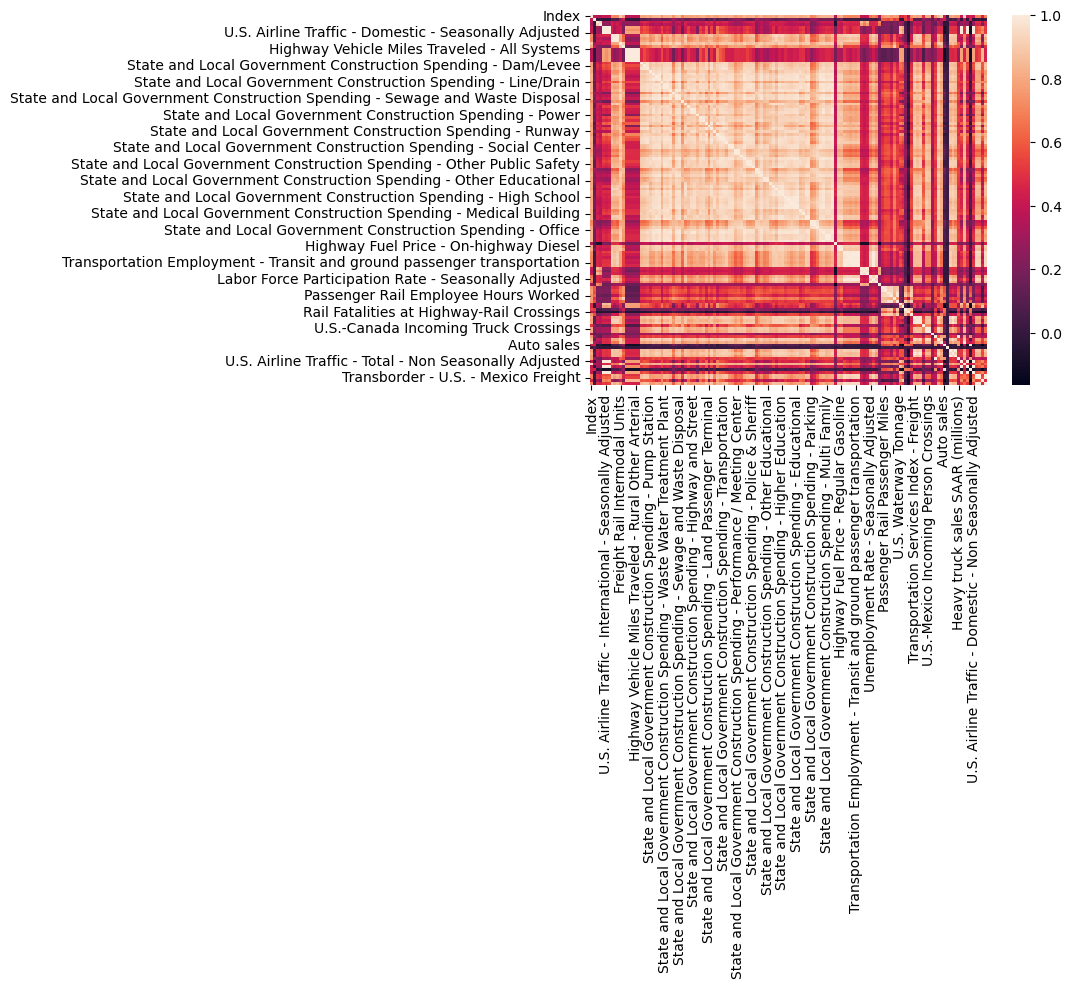

In [10]:
sns.heatmap(corr)
plt.show()

***
There appears to be many positive correlations and a few negative correlations.  I believe we can help ourselves a little by limiting the heatmap to only select values of correclation that exceed 0.75 or are less the 0.25.

In [11]:
corr.head()

,Index,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
Index,1.000000,0.408511,0.364560,0.331452,0.408024,0.393793,0.409513,0.729742,0.702186,0.712114,...,0.767248,0.406996,0.945159,0.391490,0.444672,0.408542,0.692963,0.689799,0.450432,0.690168
Air Safety - General Aviation Fatalities,0.408511,1.000000,-0.009688,0.004248,-0.027150,-0.026457,-0.027216,0.064630,0.081808,0.068270,...,0.297984,-0.025182,0.380011,-0.024735,0.439147,-0.025208,0.007772,0.000746,-0.034018,0.013844
Highway Fatalities Per 100 Million Vehicle Miles Traveled,0.364560,-0.009688,1.000000,0.920435,0.297363,0.286950,0.298451,0.436528,0.380742,0.410899,...,0.181476,0.300131,0.327844,0.291915,-0.029290,0.300827,0.485881,0.494286,0.306535,0.474648
Highway Fatalities,0.331452,0.004248,0.920435,1.000000,0.259473,0.254336,0.259881,0.445611,0.394515,0.426040,...,0.157818,0.262718,0.292814,0.258218,-0.003097,0.262957,0.455182,0.459466,0.209416,0.447793
U.S. Airline Traffic - Total - Seasonally Adjusted,0.408024,-0.027150,0.297363,0.259473,1.000000,0.993007,0.999872,0.452536,0.323715,0.400056,...,0.300172,0.996349,0.483742,0.986530,-0.095341,0.996297,0.572394,0.618587,0.725064,0.527478


[]

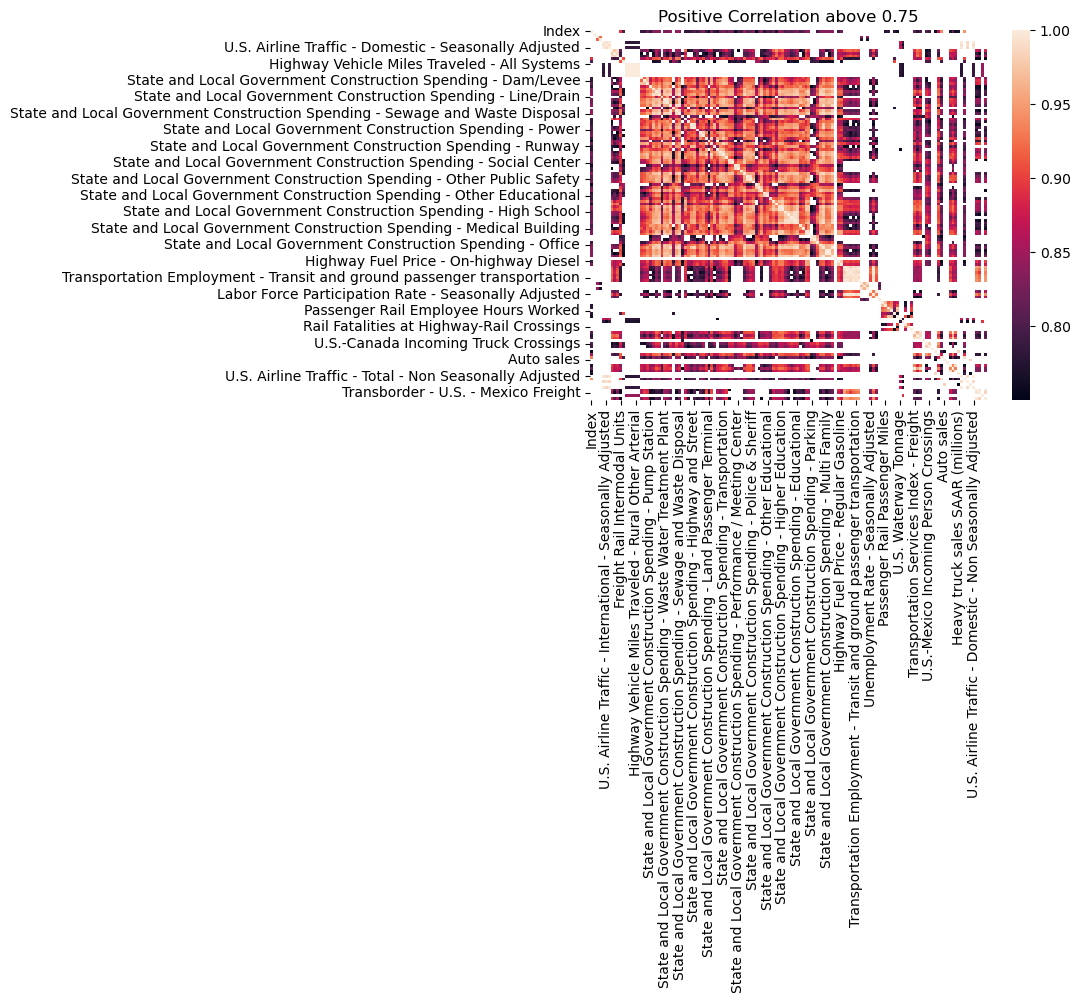

In [12]:
corr_columns = corr.columns
positive_corr = corr[corr[corr_columns] >= 0.75]
sns.heatmap(positive_corr)
plt.title("Positive Correlation above 0.75")
plt.plot()

[]

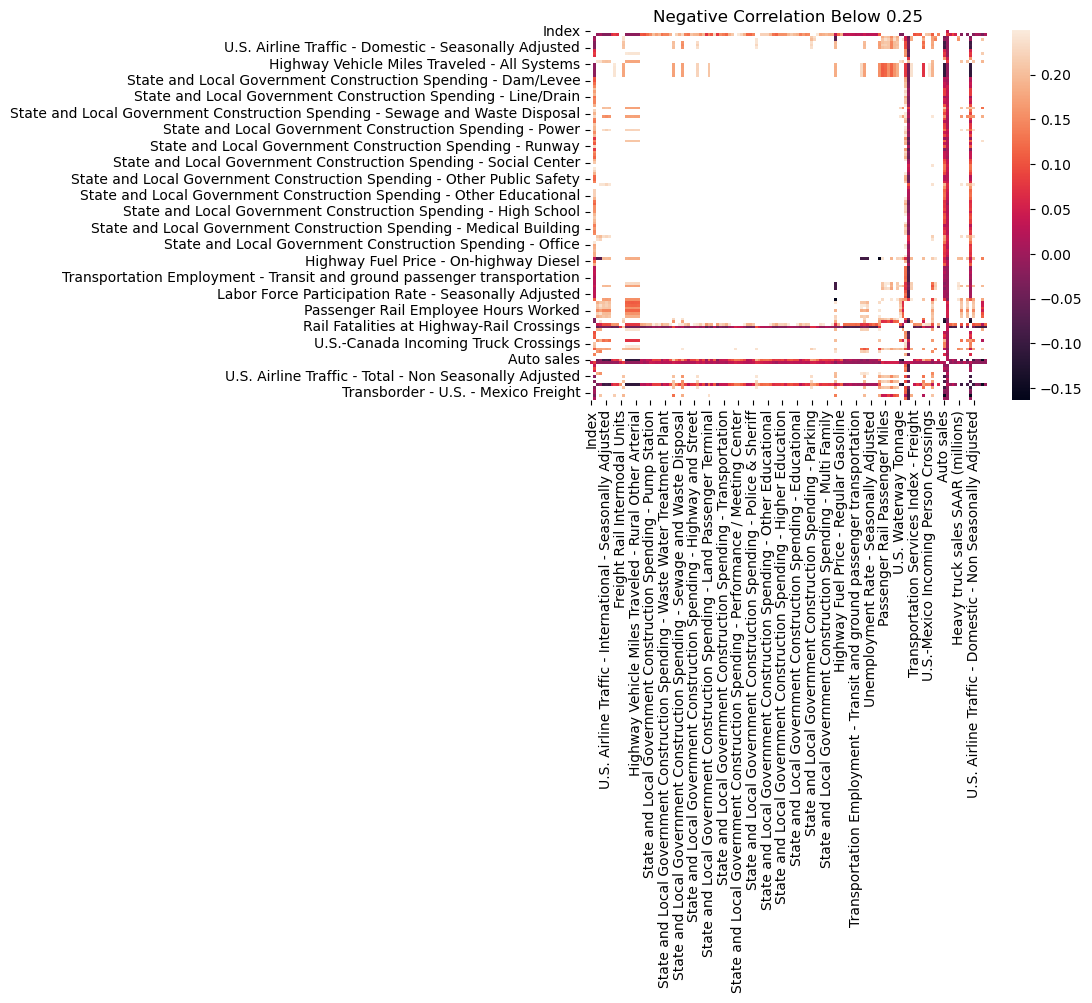

In [13]:
negative_corr = corr[corr[corr_columns] <= 0.25]
sns.heatmap(negative_corr)
plt.title("Negative Correlation Below 0.25")
plt.plot()

In [14]:
# Filter correlation map by positive and negative correlations.
filter_columns = {}

for col in corr.columns:
    filter_columns[col] = []

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if (corr.iloc[[i],[j]] >= 0.75).bool() or (corr.iloc[[i],[j]] <= 0.25).bool():
            filter_columns[corr.iloc[[i],[j]].columns[0]].append(corr.iloc[[i],[j]].index[0])

/tmp/ipykernel_4841/504591281.py:9: FutureWarning: DataFrame.bool is now deprecated and will be removed in future version of pandas
  if (corr.iloc[[i],[j]] >= 0.75).bool() or (corr.iloc[[i],[j]] <= 0.25).bool():


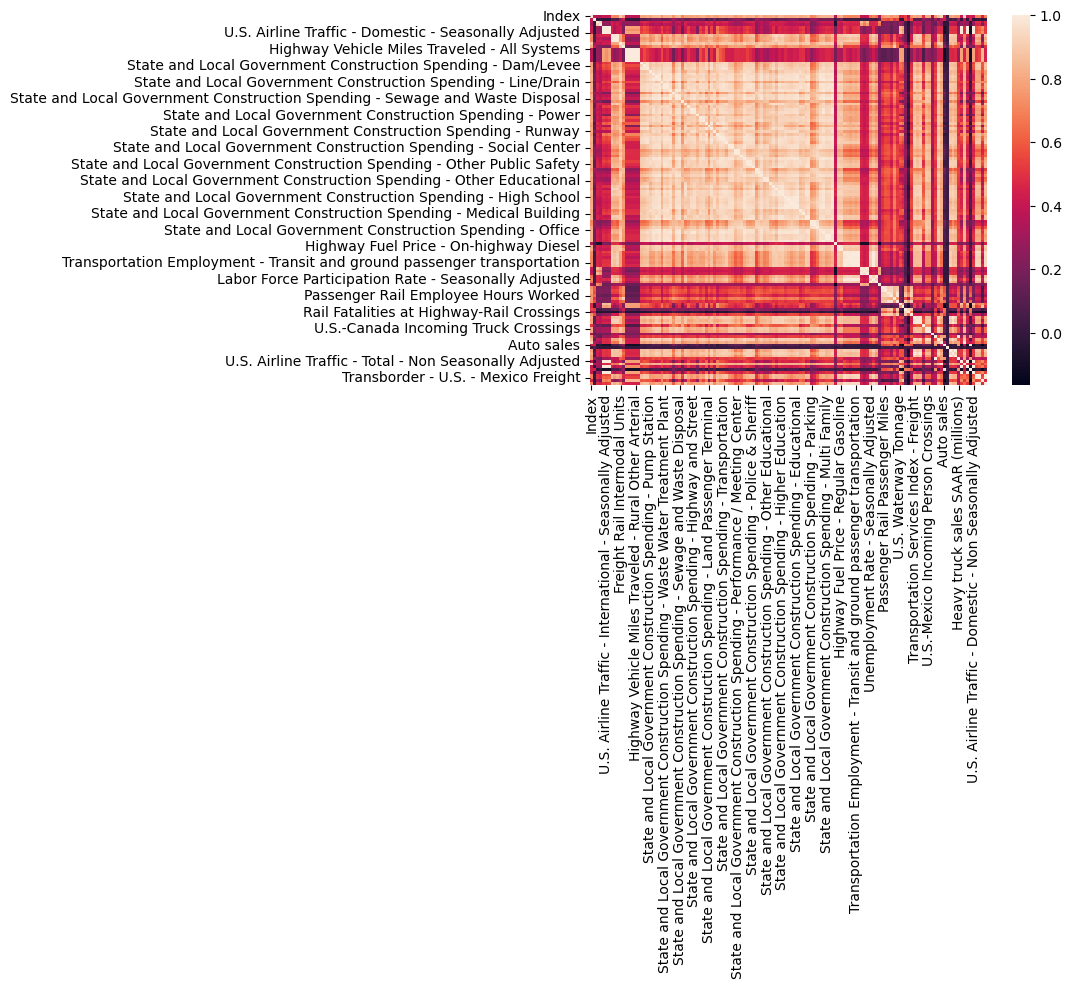

In [15]:
corr_filtered = sns.heatmap(corr[filter_columns.keys()])

***
So it seems that no matter how fine we cut it, just about everything is either strongly correlated both positively and negatively  So next we are going to graph a resume of the data to see all of these correlations, and see if we can't divine if any are not only correlated but have a causal relationship

So let's filter subset or df let's start with the aviation segment of data.

In [16]:
def df_filtered_subset(string, df):
    col_filter = []
    for  col in df.columns:
        if string in col.lower():
            col_filter.append(col)
    
    return df[col_filter]

In [17]:
air_df = df_filtered_subset('air', df)

In [18]:
air_df.head()

,Air Safety - General Aviation Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,State and Local Government Construction Spending - Air Passenger Terminal,State and Local Government Construction Spending - Air,Transportation Employment - Air Transportation,Air Safety - Air Taxi and Commuter Fatalities,Air Safety - Air Carrier Fatalities,U.S. Air Carrier Cargo (millions of revenue ton-miles) - International,U.S. Air Carrier Cargo (millions of revenue ton-miles) - Domestic,U.S. Airline Traffic - Total - Non Seasonally Adjusted,U.S. Airline Traffic - International - Non Seasonally Adjusted,U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,U.S. marketing air carriers on-time performance (percent)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Excellent! now let's see what we can find in here!

In [19]:
air_df.describe()

,Air Safety - General Aviation Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,State and Local Government Construction Spending - Air Passenger Terminal,State and Local Government Construction Spending - Air,Transportation Employment - Air Transportation,Air Safety - Air Taxi and Commuter Fatalities,Air Safety - Air Carrier Fatalities,U.S. Air Carrier Cargo (millions of revenue ton-miles) - International,U.S. Air Carrier Cargo (millions of revenue ton-miles) - Domestic,U.S. Airline Traffic - Total - Non Seasonally Adjusted,U.S. Airline Traffic - International - Non Seasonally Adjusted,U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,U.S. marketing air carriers on-time performance (percent)
count,924.000000,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,924.000000,924.000000,924.000000,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,924.000000
mean,34.308442,4.536818e+06,5.260281e+05,4.010790e+06,1.785141e+08,3.395195e+08,111334.956710,0.650433,0.397186,5.624417e+08,3.415403e+08,4.529957e+06,5.262121e+05,4.003745e+06,0.059632
std,45.780402,1.707314e+07,2.042495e+06,1.504699e+07,2.890003e+08,4.909818e+08,201434.306105,2.103521,5.993788,9.352849e+08,5.694485e+08,1.709522e+07,2.056010e+06,1.506032e+07,0.210721
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,23.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,56.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.870000e+08,6.770000e+08,0.000000,0.000000,0.000000,1.606629e+09,9.939436e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
max,345.000000,8.060000e+07,9.790000e+06,7.087000e+07,1.302000e+09,2.225000e+09,521700.000000,22.000000,160.000000,2.929605e+09,1.961054e+09,8.696000e+07,1.167000e+07,7.528000e+07,0.900000


In [20]:
air_df['U.S. marketing air carriers on-time performance (percent)'].

SyntaxError: invalid syntax (2572452035.py, line 1)

<Axes: >

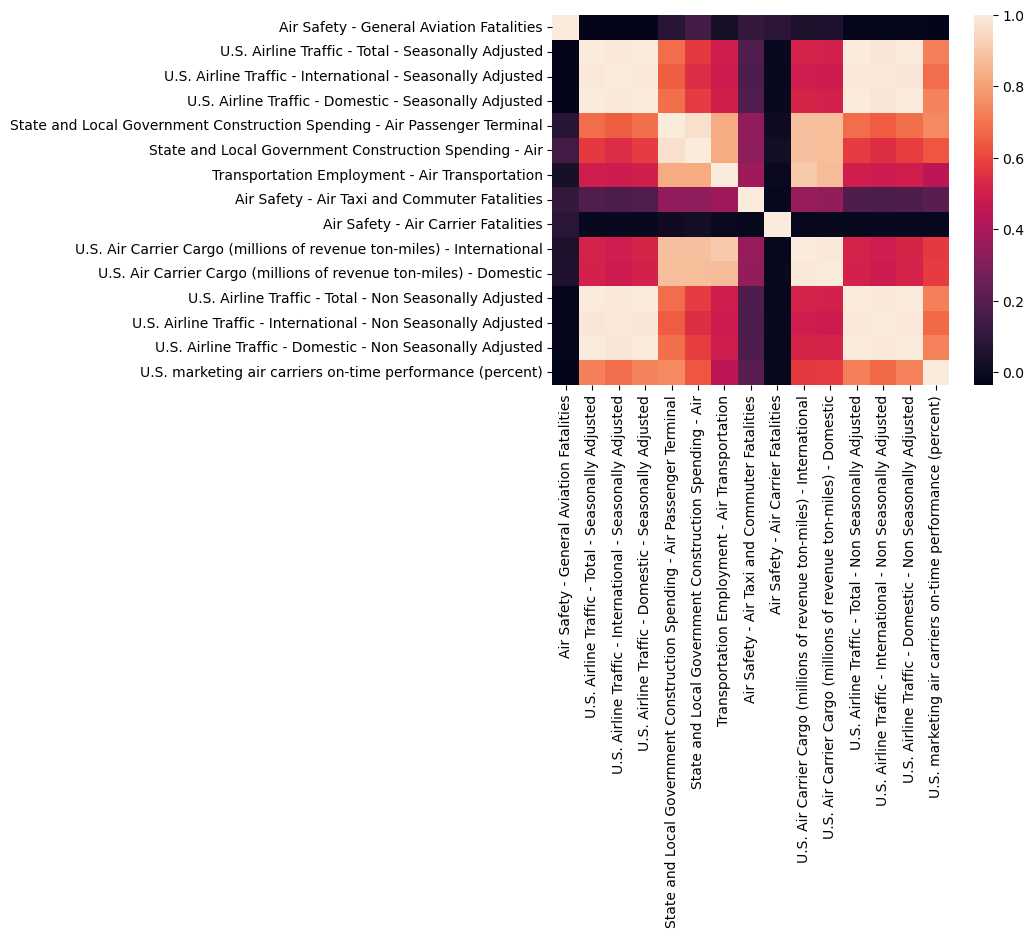

In [ ]:
sns.heatmap(air_df.corr())

As one could guess there are a lot of strong postitive and negative correlations here within just this subset. Let's take a closer look.

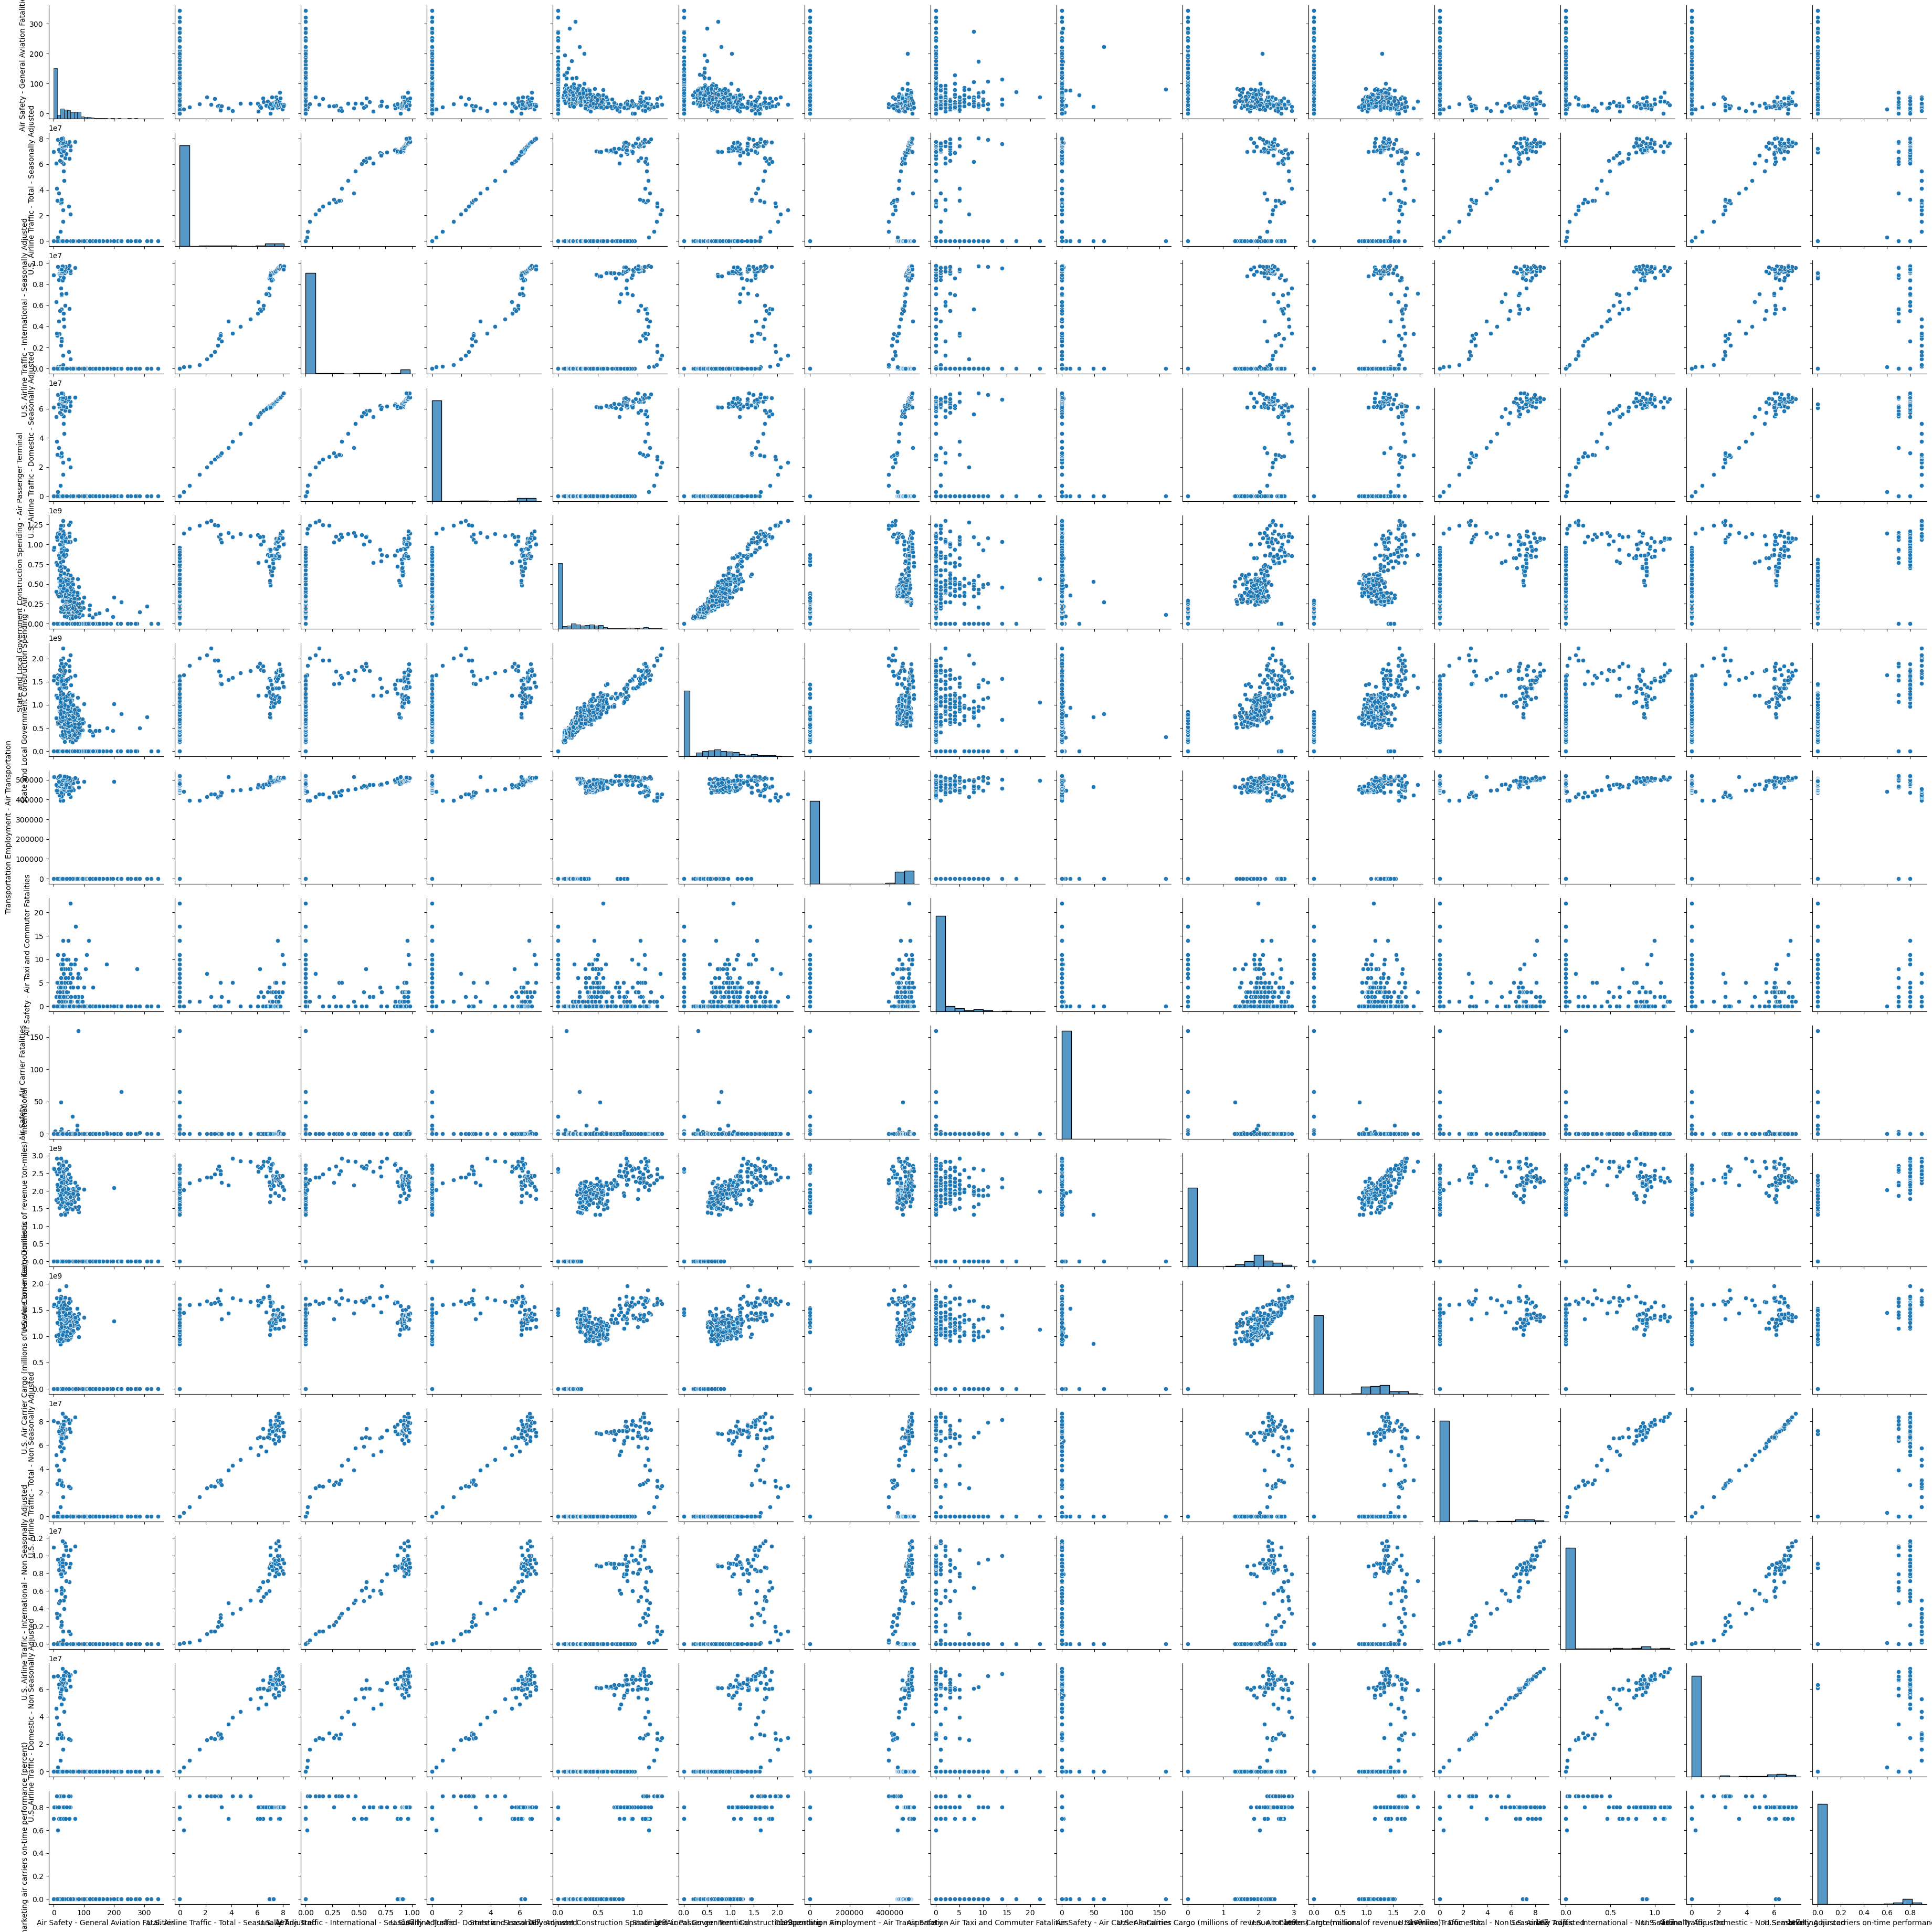

In [ ]:
g = sns.pairplot(air_df)
plt.show()